In [91]:
import pandas as pd
import numpy as np
import datetime
import os
import re
import matplotlib.pyplot as plt

In [96]:
dir = "./../data/ROAMM/"
files = os.listdir(dir)
files_needed = []

for file in files:
    if 'sensor' in file:
        files_needed.append(file)
files_needed = sorted(files_needed)

# read all files and add them to one dataframe
data_list = []
for file in files_needed:
    data = pd.read_json("./../data/ROAMM/"+file)
    data_list.append(data)
data = pd.concat(data_list)

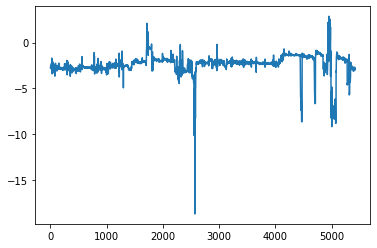

In [86]:
data.accelX.plot()

In [21]:
startTime = ""
endTime = ""
fp = open("./../result/log.txt", 'w')
prev = 0
num = 0
for i in range(data.shape[0]):
    accelX = data.iloc[i, 2]
    if prev == accelX:
        num += 1
        if num == 1:
            startTime = str(data.iloc[i, 10]) 
            
    if prev != accelX:
        if num > 10:
            endTime = str(data.iloc[i, 10]) 
            fp.write("Found    " + startTime + "   "+endTime+'\n')
        num = 0
    
    prev = accelX
fp.close()

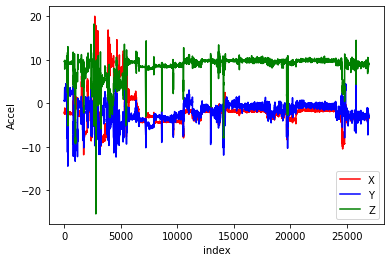

In [97]:

    x = data.accelX
    y = data.accelY
    z = data.accelZ
    
    index = [i for i in range(len(x))]
    
    plt.plot(index, x, 'r-', label='X')
    plt.plot(index, y, 'b-', label='Y')
    plt.plot(index, z, 'g-', label='Z')

    #plt.title('Accelerometer data for Activity #%d'%activity)
    plt.xlabel('index')
    plt.ylabel('Accel')
    
    plt.legend()

    plt.show()